In [6]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')



In [7]:
# Load the Data
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


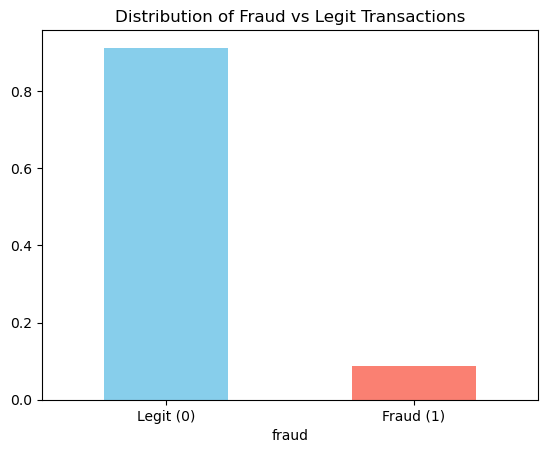

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64
fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


In [8]:
#Distribution of Target Variable
fraud['fraud'].value_counts(normalize=True).plot(kind="bar", color=['skyblue','salmon'])
plt.title("Distribution of Fraud vs Legit Transactions")
plt.xticks([0,1], ["Legit (0)", "Fraud (1)"], rotation=0)
plt.show()

print(fraud['fraud'].value_counts())
print(fraud['fraud'].value_counts(normalize=True))


## Fraud cases will be much smaller than legit → imbalanced dataset.

In [9]:
# train-test split
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [10]:
# base modele- logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


[[271937   1842]
 [ 10434  15787]]
              precision    recall  f1-score   support

         0.0     0.9630    0.9933    0.9779    273779
         1.0     0.8955    0.6021    0.7200     26221

    accuracy                         0.9591    300000
   macro avg     0.9293    0.7977    0.8490    300000
weighted avg     0.9571    0.9591    0.9554    300000

ROC-AUC: 0.9671810632197307


## High accuracy (because of many legit cases), but recall for fraud = low.

In [11]:
# oversampling 
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

log_reg.fit(X_res, y_res)
y_pred_ros = log_reg.predict(X_test)
y_proba_ros = log_reg.predict_proba(X_test)[:,1]

print("Oversampling Results")
print(confusion_matrix(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_ros))


Oversampling Results
[[255520  18259]
 [  1357  24864]]
              precision    recall  f1-score   support

         0.0     0.9947    0.9333    0.9630    273779
         1.0     0.5766    0.9482    0.7171     26221

    accuracy                         0.9346    300000
   macro avg     0.7857    0.9408    0.8401    300000
weighted avg     0.9582    0.9346    0.9415    300000

ROC-AUC: 0.9795658338368834


## better recall for fraud, but maybe more false positives.

In [12]:
# undersampling 
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

log_reg.fit(X_res, y_res)
y_pred_rus = log_reg.predict(X_test)
y_proba_rus = log_reg.predict_proba(X_test)[:,1]

print("Undersampling Results")
print(confusion_matrix(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rus))


Undersampling Results
[[255532  18247]
 [  1327  24894]]
              precision    recall  f1-score   support

         0.0     0.9948    0.9334    0.9631    273779
         1.0     0.5770    0.9494    0.7178     26221

    accuracy                         0.9348    300000
   macro avg     0.7859    0.9414    0.8405    300000
weighted avg     0.9583    0.9348    0.9417    300000

ROC-AUC: 0.9795883704614473


## recall to improve but precision/accuracy to drop, since legit cases are reduced

In [13]:
# SMOT
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

log_reg.fit(X_res, y_res)
y_pred_sm = log_reg.predict(X_test)
y_proba_sm = log_reg.predict_proba(X_test)[:,1]

print("SMOTE Results")
print(confusion_matrix(y_test, y_pred_sm))
print(classification_report(y_test, y_pred_sm, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_sm))


SMOTE Results
[[255665  18114]
 [  1401  24820]]
              precision    recall  f1-score   support

         0.0     0.9946    0.9338    0.9632    273779
         1.0     0.5781    0.9466    0.7178     26221

    accuracy                         0.9349    300000
   macro avg     0.7863    0.9402    0.8405    300000
weighted avg     0.9582    0.9349    0.9418    300000

ROC-AUC: 0.9792851153372982


In [14]:
# summary table 
results = {
    "Model": ["Base", "Oversample", "Undersample", "SMOTE"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_proba),
        roc_auc_score(y_test, y_proba_ros),
        roc_auc_score(y_test, y_proba_rus),
        roc_auc_score(y_test, y_proba_sm),
    ]
}

pd.DataFrame(results)


,Model,ROC-AUC
0,Base,0.967181
1,Oversample,0.979566
2,Undersample,0.979588
3,SMOTE,0.979285
